In [14]:
import pandas as pd
import numpy as np
import json

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

def load_data(fpath) :
    with open(fpath) as f:
        data = json.load(f)
    return data

## RQ1

Measure the WER overtime

In [38]:
# wer = [0.044484] # first WER using original pretrained deepspeech
# iter = [0]
wer = []
iter = []
fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_6/text_batch_size_1200/with-estimator-facebook-bart-base-dynamic.txt"

# fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-latest.txt"

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "WER:" :
                i += 1
                iter.append(i)
                wer.append(float(token[j+1].replace(",","")))
f.close()

wer = [w * 100 for w in wer]
wer

[7.994700000000001, 5.1964999999999995, 4.7302, 4.596900000000001, 4.3304]

No handles with labels found to put in legend.


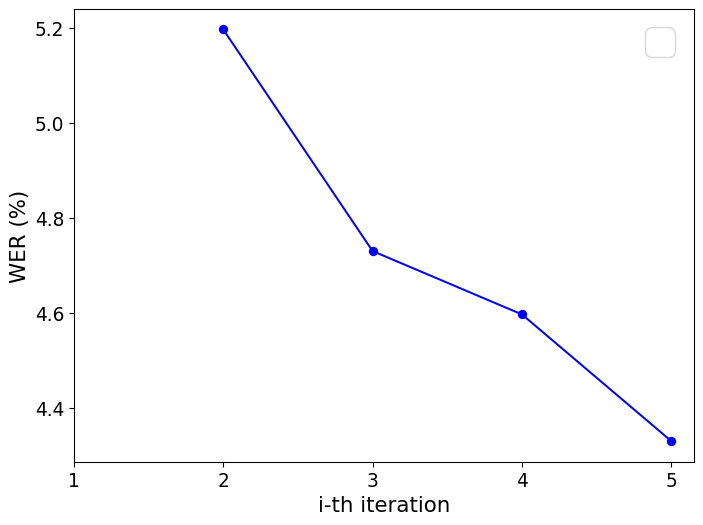

In [39]:
num_iteration = 5

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter[1:num_iteration], wer[1:num_iteration], color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter[:num_iteration], fontsize=14)
plt.ylabel('WER (%)', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

In [17]:
# wer = [0.044484] # first WER using original pretrained deepspeech
# iter = [0]
loss = []
iter = []

f = open(fpath, "r")
lines = f.readlines()
i = 0
for l in lines :
    if "Test on ../output/europarl-seed2021/fine_tune_data/test.csv" in l :
        token = l.split()
        for j in range(len(token)) :
            if token[j] == "loss:" :
                i += 1
                iter.append(i)
                loss.append(float(token[j+1].replace(",","")))
f.close()

loss

[7.629474,
 4.641132,
 4.082982,
 3.796425,
 3.596991,
 3.563578,
 3.260144,
 3.164884,
 3.078297]

No handles with labels found to put in legend.


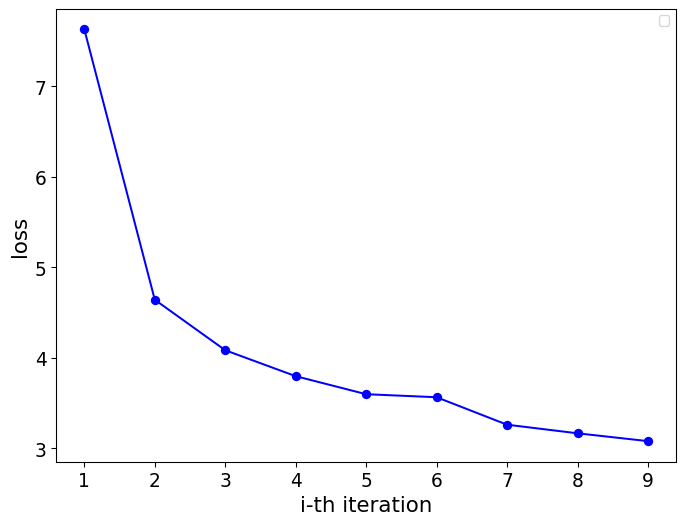

In [18]:
# my_dpi = 32
my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter, loss, color='blue', marker='o')
# plt.title('', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel('loss', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq1-loss.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

### Number of Failed Test Cases on The Static Deepspeech

In [19]:
## Combine with the number of failed test cases
fpath = "output/europarl-seed2021/result/rv/deepspeech_deepspeech2_wav2letter_wit_wav2vec2/num_iteration_5/text_batch_size_1200/with-estimator-facebook-bart-base.json"

data = load_data(fpath)
del data["number_of_failed_test_cases_all"]
del data["number_of_processed_texts"]
static = data["number_of_failed_test_cases_per_asr"]["deepspeech"]
static



[59, 137, 222, 318, 399]

### Number of Failed Test Cases on The Evolved Deepspeech

In [40]:
def reformat_data(data, asrs): #match with crossasr format
    nftc = data["number_of_failed_test_cases_per_asr"]
    temp = {}
    for asr in asrs :
        ftc = []  
        for i in range(len(nftc)) :
            ftc.append(nftc[i][asr])
        temp[asr] = ftc
    data["number_of_failed_test_cases_per_asr"] = temp


fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_6/text_batch_size_1200/with-estimator-facebook-bart-base-dynamic.json"

data = load_data(fpath)


dynamic = []
cum = 0 # cumulative
last_cumulative_deepspeech = 0
for i, nftc in enumerate(data["number_of_failed_test_cases_per_asr"]) :
    if i < 5 :
        if "deepspeech" in nftc :
            cum = nftc["deepspeech"]
            last_cumulative_deepspeech = cum
        else :
            cum = nftc["finetuned_deepspeech"] + last_cumulative_deepspeech
        dynamic.append(cum)
dynamic

[59, 137, 216, 254, 296]

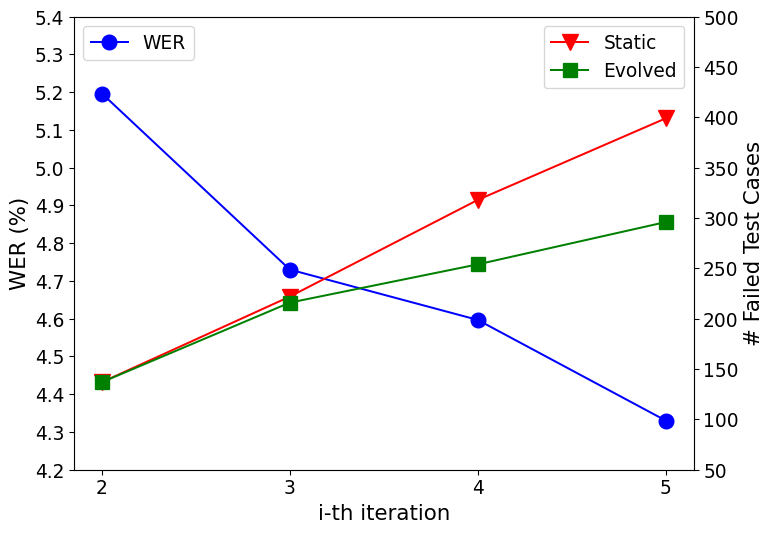

In [42]:
num_iteration = 5

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.plot(iter[1:num_iteration], wer[1:num_iteration], color='blue', marker='o', markersize=11, label="WER")
plt.xlabel('i-th iteration when fine-tuning the SUT', fontsize=16)
plt.xticks(iter[:num_iteration], fontsize=14)
plt.ylabel('WER (%)', fontsize=16)
plt.yticks(np.arange(4.2, 5.5, 0.1), fontsize=14)
plt.legend(loc='upper left', fontsize=14)

plt.twinx()
plt.plot(iter[1:num_iteration], static[1:num_iteration], color='red', marker='v', markersize=12, label="Static")
plt.plot(iter[1:num_iteration], dynamic[1:num_iteration], color='green', marker='s', markersize=10, label="Evolved")
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(np.arange(50, 550, 50), fontsize=14)
# plt.grid(True)
plt.legend(loc='upper right', fontsize=14)
plt.savefig("rq1.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

## RQ2

Comparison of the number of failed test cases found with CrossASR++

### Read result from old CrossASR++

In [22]:
# fpath = "output/europarl-seed2021/result/rv/deepspeech_deepspeech2_wav2letter_wit_wav2vec2/num_iteration_5/text_batch_size_1200/with-estimator-facebook-bart-base.json"


# def crossasr_offset_with_first_iteration(data) :
#     nftc = data["number_of_failed_test_cases_all"]
#     nftc_first = nftc[0]
#     for i in range(1, len(nftc)) :
#         nftc[i] -= nftc_first
#     del nftc[0]
#     data["number_of_failed_test_cases_all"] = nftc

#     nftc = data["number_of_processed_texts"]
#     nftc_first = nftc[0]
#     for i in range(1, len(nftc)) :
#         nftc[i] -= nftc_first
#     del nftc[0]
#     data["number_of_processed_texts"] = nftc

#     nftc = data["number_of_failed_test_cases_per_asr"]
#     for asr in ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] :
#         nftc_first = nftc[asr][0]
#         for i in range(1, len(nftc[asr])) :
#             nftc[asr][i] -= nftc_first
#         del nftc[asr][0]
#     data["number_of_failed_test_cases_per_asr"] = nftc

# data = load_data(fpath)
# crossasr_offset_with_first_iteration(data)
# del data["number_of_failed_test_cases_all"]
# del data["number_of_processed_texts"]
# crossasr = data


### Read result from ASREvolve

In [23]:
def offset_with_first_iteration(data):
    nftc = data["number_of_failed_test_cases_per_asr"]
    nftc_first = nftc[0]
    for i in range(1, len(nftc)) :
        for asr in ["deepspeech2", "wav2letter", "wav2vec2", "wit"] :
            nftc[i][asr] -= nftc_first[asr]
    del nftc[0]
    data["number_of_failed_test_cases_per_asr"] = nftc

def reformat_data(data, asrs): #match with crossasr format
    nftc = data["number_of_failed_test_cases_per_asr"]
    temp = {}
    for asr in asrs :
        ftc = []  
        for i in range(len(nftc)) :
            ftc.append(nftc[i][asr])
        temp[asr] = ftc
    data["number_of_failed_test_cases_per_asr"] = temp


fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-latest-rq2.json"

data = load_data(fpath)
offset_with_first_iteration(data)
data["number_of_failed_test_cases_per_asr"] = data["number_of_failed_test_cases_per_asr"]
asrs = ["deepspeech2", "finetuned_deepspeech", "wav2letter", "wav2vec2", "wit"] 
reformat_data(data, asrs)

asrevolve = data


### Result from CrossASR++


In [24]:

fpath = "output/europarl-seed2021/result/rv/wav2vec2_deepspeech_deepspeech2_wav2letter_wit/num_iteration_10/text_batch_size_1200/with-estimator-facebook-bart-base-original-rq2.json"

data = load_data(fpath)
offset_with_first_iteration(data)
data["number_of_failed_test_cases_per_asr"] = data["number_of_failed_test_cases_per_asr"]
asrs = ["deepspeech2", "deepspeech", "wav2letter", "wav2vec2", "wit"] 
reformat_data(data, asrs)

crossasr = data
crossasr

{'number_of_failed_test_cases_per_asr': {'deepspeech2': [54,
   110,
   166,
   209,
   276,
   337,
   386,
   439,
   511],
  'deepspeech': [137, 212, 283, 338, 413, 478, 549, 645, 731],
  'wav2letter': [107, 213, 317, 395, 509, 613, 712, 810, 923],
  'wav2vec2': [62, 127, 193, 249, 298, 360, 431, 491, 552],
  'wit': [236, 461, 691, 891, 1119, 1350, 1565, 1785, 2008]}}

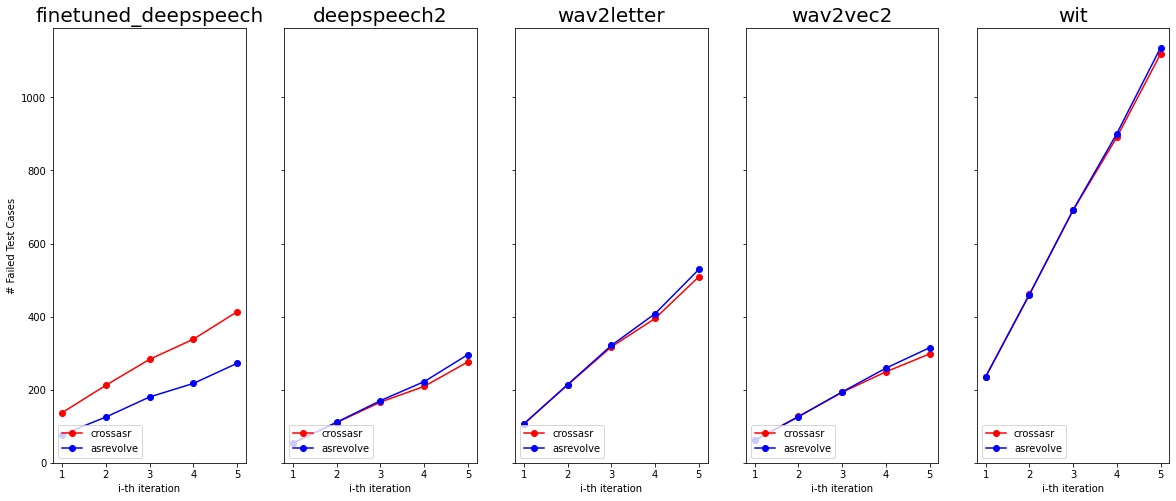

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 8), sharey=True)

asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 
iter = list(range(1,10))

num_iteration = 5

for i, asr in enumerate(asrs) :
    asr_name = "deepspeech" if asr == "finetuned_deepspeech" else asr
    axs[i].plot(iter[:num_iteration], crossasr["number_of_failed_test_cases_per_asr"][asr_name][:num_iteration], marker='o', color="red", label="crossasr")
    axs[i].plot(iter[:num_iteration], asrevolve["number_of_failed_test_cases_per_asr"][asr][:num_iteration], marker='o', color="blue", label="asrevolve")
    fontdict = {"fontsize": 20}
    axs[i].set_title(asr, fontdict)
    axs[i].set_xlabel('i-th iteration')
    if i == 0 :axs[i].set_ylabel('# Failed Test Cases')
    axs[i].legend(loc='lower left')

fig.savefig("rq2-detail.png", bbox_inches='tight', dpi=my_dpi)

### RQ2 Summary

In [26]:
from matplotlib.dates import date2num
import datetime

asrs = ["deepspeech", "wav2vec2", "deepspeech2", "wav2letter", "wit"]
asr_names = ["DeepSpeech", "Wav2Vec2", "DeepSpeech2", "Wav2Letter", "Wit"] 

crossasr_summary = []
asrevolve_summary = []


for asr in asrs :
    crossasr_summary.append(crossasr["number_of_failed_test_cases_per_asr"][asr][:num_iteration][-1])
    asr_name = asr
    if asr == "deepspeech" : asr_name = "finetuned_deepspeech"
    asrevolve_summary.append(asrevolve["number_of_failed_test_cases_per_asr"][asr_name][:num_iteration][-1])


In [27]:
asrevolve_summary

[272, 315, 296, 529, 1136]

In [28]:
crossasr_summary

[413, 298, 276, 509, 1119]

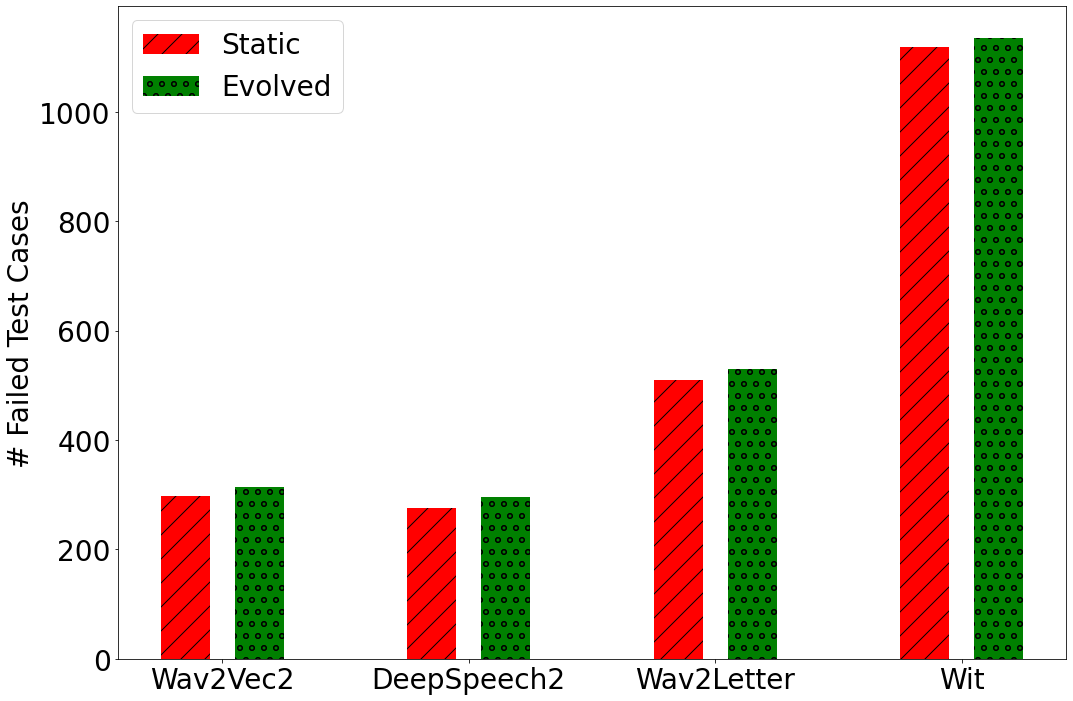

In [29]:

params = {'legend.fontsize': 28,
          'figure.figsize': (12, 9),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':24,
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

x = np.array(list(range(1, len(asrs[1:])+1)))


fig, ax = plt.subplots(figsize=(17, 12))
ax.bar(x-0.15, crossasr_summary[1:], width=0.2, color='red', align='center', label='Static', hatch="/")
ax.bar(x, [0]*len(asr_names[1:]), width=0.2, color='g', align='center', tick_label=asr_names[1:])
ax.bar(x+0.15, asrevolve_summary[1:], width=0.2, color='green', align='center', label='Evolved', hatch="o")
ax.set_ylabel("# Failed Test Cases", fontsize=28)
ax.tick_params(axis='both', which='major', labelsize=28)
ax.legend()
fig.savefig("rq2-summary.png", bbox_inches='tight', dpi=my_dpi)
plt.show()




In [30]:
## reduce in deepspeech
a = asrevolve_summary[0]
c = crossasr_summary[0]

print(a)
print(c)

((c-a)/c)*100


272
413


34.14043583535109

In [31]:
## increase in another ASR systems
a = sum(asrevolve_summary[1:])
c = sum(crossasr_summary[1:])

((a-c)/c)*100


3.3605812897366025

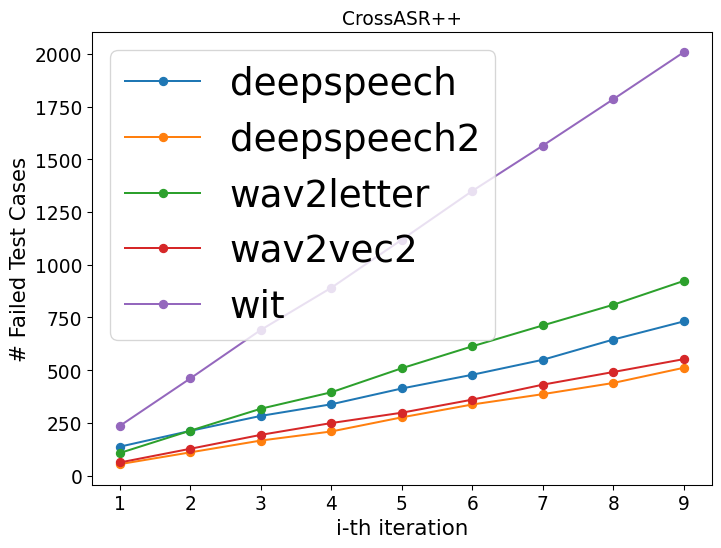

In [32]:
asrs = ["deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, crossasr["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('CrossASR++', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()

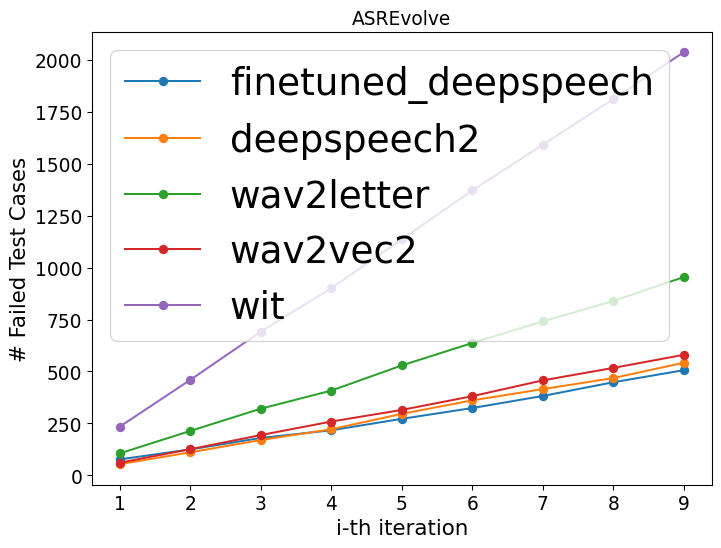

In [33]:
asrs = ["finetuned_deepspeech", "deepspeech2", "wav2letter", "wav2vec2", "wit"] 

my_dpi = 96
plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
for asr in asrs :
    plt.plot(iter, asrevolve["number_of_failed_test_cases_per_asr"][asr], marker='o', label=asr)
plt.title('ASREvolve', fontsize=14)
plt.xlabel('i-th iteration', fontsize=16)
plt.xticks(iter, fontsize=14)
plt.ylabel('# Failed Test Cases', fontsize=16)
plt.yticks(fontsize=14)
# plt.grid(True)
plt.legend()
plt.savefig("rq2.png", bbox_inches='tight', dpi=my_dpi)
plt.show()